In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import numpy as np

# Set Theory: From mathematics to SQL

## Relational Database Concepts, T-SQL Joins and Python

<i><span style="float:right">Author: Georgi Dimov</span></i>

<strong>Abstract</strong><br>   In this Notebook I will try to show the basics of Set Theory and how it is used in today's Relational Databases. The emphasis of the document will be SQL-Joins. The SQL Joins will be visualized through Venn Diagramms for better understanding. Inner, Left, Right and Full Outer join will be shown as well as some joins which don't have a name, simply because they are not widely, if ever, used, but they will just help the deeper understanding of SQL joins in general.<br>   If you want to fully understand the examples shown below, I really recommend that you run them yourself. The software needed for it is Microsoft SQL Server Management Studio. Versions 2008/2012/2014/2016 will do just fine. The script which you can run to create and seed the database can be found in the <a href="https://github.com/George221b/FromSetTheoryToSQL">root</a> directory, named <a href="https://github.com/George221b/FromSetTheoryToSQL/blob/master/UsersDB.sql">UsersDB.sql</a>

If you are interested in databases, or to be more specific relational databases, you have probably heard the term <em>Set</em>. Or you have heard the expression - Think of it as a set. The theory of relational databases is built upon the mathematical theory of sets. So what exactly is it?

### <span style="color:#483D8B">Set Theory</span>

Set theory in mathematics deals with groups of objects. It describes the relationship of an object with a set or group. The next question that arises is probably, then what is a set? The most basic definition for a set is: collection of things. For me that sounds a bit too abstract, so another definition that gives us a better view of the same thing will be: <div style="text-align: center"><br><em>A set is nothing more than an unordered collection of elements with absolutely no duplicates.</em></div><br>There three things on which we have to pay attention: elements, unordered and no dublicates. If you remember that definition you will have little to no trouble understanding the examples given below.

### <span style="color:#483D8B">Python on Set Theory</span>

The best way to graphically represent an operation on sets, it's with the help of Venn diagrams, which show all possible logical relations between a finite number of different sets. The best thing about Venn diagrams is that, there is a Python package about it. It is called <strong><em>matplotlib-venn</em></strong> and I am going to use the latest version of it, which is <i>0.11.5</i> at the moment. So keep that in mind, in case you want to test yourself some of the examples below. <br> The matplotlib-venn package is really good and very intuitive for using. You can download or read the documentation <a href="https://pypi.python.org/pypi/matplotlib-venn">here</a>.

### <span style="color:#483D8B;padding: 0px">Inner Join / Intersection</span>

One of the most, if not the most, used SQL join. The intersection of two sets is often denoted in shorthand like this: $A \cap B$. In other words, it yields all of the elements that exist within both of the sets. Which means the intersection of two sets contains only the elements which are the same and nothing else. A good way keyword to remember how intersections work is the word and: the elements that exists in both X and Y.

$$
A \cap B = \{x: x \in A \: and \: x \in B\}
$$

This is how the Venn Diagram looks. Note that only the purple is the Intersection.

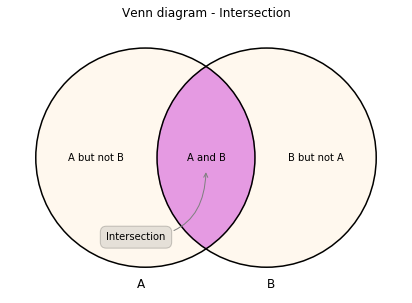

In [3]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('A but not B')
v.get_label_by_id('01').set_text('B but not A')
v.get_label_by_id('11').set_text('A and B')

# Subset colors
v.get_patch_by_id('10').set_color('#FFEFD5')
v.get_patch_by_id('01').set_color('#FFEFD5')
v.get_patch_by_id('11').set_color('#DA70D6')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_alpha(0.7)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings and arrow
plt.title("Venn diagram - Intersection")
plt.annotate('Intersection', xy=v.get_label_by_id('11').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.6', fc='gray', alpha=0.2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

   It's time to show some SQL code. If you have ran the code in <a href="https://github.com/George221b/FromSetTheoryToSQL/blob/master/UsersDB.sql">UsersDB.sql</a> file, located in the <a href="https://github.com/George221b/FromSetTheoryToSQL">root</a> directory, you've probably noticed that we have 2 tables there. <strong>Users</strong> table and <strong>Countries</strong> table. The two tables are connected with each other via a foreign key (FK_Users_Country). In our case the CountryId(table Users) and Id(table Countries) are connected. Read more about the relations between the table <a href="https://code.tutsplus.com/articles/sql-for-beginners-part-3-database-relationships--net-8561">here</a>.<br>
   <p>The logic behind the example database is such:  We have users and they <strong>can</strong> choose where they live. But they are not obligated to choose. Keep that in mind.</p>
   If we ran the following code:

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:gray">INNER JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id

The result we get:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float: left">
  <tr>
    <th class="tg-amwm">Id</th>
    <th class="tg-amwm">FirstName</th>
    <th class="tg-amwm">Lastname</th>
    <th class="tg-amwm">Id</th>
    <th class="tg-amwm">CountryName</th>
  </tr>
  <tr>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Betty</td>
    <td class="tg-yw4l">Wallace</td>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Austria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Rachel</td>
    <td class="tg-yw4l">Bishop</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Bulgaria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Joan</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Germany</td>
  </tr>
</table>

This are all the users which have a country and respectively all countries which have a user.

### <span style="color:#483D8B;padding: 0px">Full Outer Join / Union</span>

The full outer join (sometimes abbreviated to full join) returns all rows from both tables named in the ON condition where the join condition is not met (including NULL values).

$$
A \cup B = \{x: x \in A \: and \: x \in B\}
$$

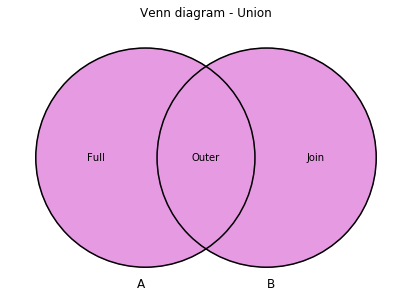

In [4]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('Full')
v.get_label_by_id('01').set_text('Join')
v.get_label_by_id('11').set_text('Outer')

# Subset colors
v.get_patch_by_id('10').set_color('#DA70D6')
v.get_patch_by_id('01').set_color('#DA70D6')
v.get_patch_by_id('11').set_color('#DA70D6')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.7)
v.get_patch_by_id('01').set_alpha(0.7)
v.get_patch_by_id('11').set_alpha(0.7)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings
plt.title("Venn diagram - Union")
plt.show()

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:blue">FULL</span><span style="color:gray"> OUTER JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id <br>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float: left">
  <tr>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">FirstName</th>
    <th class="tg-9hbo">LastName</th>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">Name</th>
  </tr>
  <tr>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Betty</td>
    <td class="tg-yw4l">Wallace</td>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Austria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Rachel</td>
    <td class="tg-yw4l">Bishop</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Bulgaria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Joan</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Germany</td>
  </tr>
  <tr>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Jean</td>
    <td class="tg-yw4l">Pierce</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">Irene</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">Quentin</td>
    <td class="tg-yw4l">Tarantino</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Indonesia</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">China</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">New Zeland</td>
  </tr>
</table>

<p style="color: purple">Disclaimer:</p>
Try to inspect the two tables closely. The first three rows of the second one are the same as the first one. <br> The set theory behind SQL is actually the foreign key. Imagine we have key value pairs for the CountryId in Users and Id in Countries. <br>
The first three people Betty, Rachel and Joan have something like this: { 1, 1 }, { 2, 2 }, { 3, 3 } <br>
While Jean, Irene and Quentin don't have a country. They haven't picked one, which means they have absolutely no connection to table Countries. Their CountryId is NULL, this means they cannot have a key value pair with the table. <br>
The same thing goes for the countries Indonesia, China and New Zeland. No one from table Users have picked them, resulting in absolutely no connection with table Users.

### <span style="color:#483D8B;padding: 0px">Set Difference - Relative Complement</span>

The relative complement of A with respect to a set B, also termed the difference of sets A and B, written B ∖ A, is the set of elements in B but not in A.

If A and B are sets, then the relative complement of A in B, also termed the set-theoretic difference of B and A, is the set of elements in B but not in A.

$$
B\setminus A = \{x \in B \: \mid \: x \notin A\}
$$

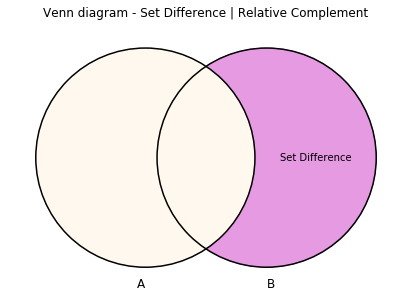

In [5]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('')
v.get_label_by_id('01').set_text('Set Difference')
v.get_label_by_id('11').set_text('')

# Subset colors
v.get_patch_by_id('10').set_color('#FFEFD5')
v.get_patch_by_id('01').set_color('#DA70D6')
v.get_patch_by_id('11').set_color('#FFEFD5')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_alpha(0.7)
v.get_patch_by_id('11').set_alpha(0.4)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings
plt.title("Venn diagram - Set Difference | Relative Complement")

plt.show()

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:gray">RIGHT JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id <br>
   <span style="color:blue">WHERE</span> u.CountryId <span style="color:gray">IS NULL</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float: left">
  <tr>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">FirstName</th>
    <th class="tg-9hbo">LastName</th>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">Name</th>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Indonesia</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">China</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">New Zeland</td>
  </tr>
</table>

The exact oppiste thing will be:
$$
A\setminus B = \{x \in A \: \mid \: x \notin B\}
$$


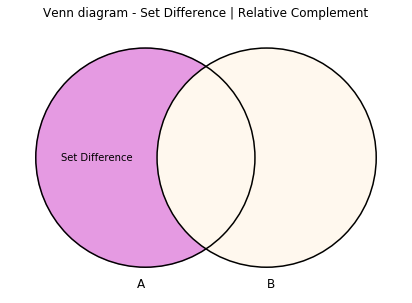

In [6]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('Set Difference')
v.get_label_by_id('01').set_text('')
v.get_label_by_id('11').set_text('')

# Subset colors
v.get_patch_by_id('10').set_color('#DA70D6')
v.get_patch_by_id('01').set_color('#FFEFD5')
v.get_patch_by_id('11').set_color('#FFEFD5')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.7)
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_alpha(0.4)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings
plt.title("Venn diagram - Set Difference | Relative Complement")

plt.show()

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:gray">LEFT JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id <br>
   <span style="color:blue">WHERE</span> c.Id <span style="color:gray">IS NULL</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float: left">
  <tr>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">FirstName</th>
    <th class="tg-9hbo">LastName</th>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">Name</th>
  </tr>
  <tr>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Jean</td>
    <td class="tg-yw4l">Pierce</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">Irene</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">Quentin</td>
    <td class="tg-yw4l">Tarantino</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
</table>

These joins are not widely used, but definitely can help in some scenarios. For instance the second Query, where we get all the people, who don't have a country can be simplified. We can get the same result without even using joins. This is possible, because our database is structured in such a way. On the other hand the first Set Difference, where we get all the countries, in which no user is registered to, is only possible via this SQL join.

### <span style="color:#483D8B;padding: 0px">Left | Right Join</span>

Let's start right with how a Venn diagram can visually represent a Left SQL join:

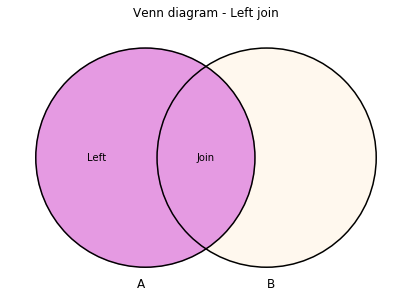

In [7]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('Left')
v.get_label_by_id('01').set_text('')
v.get_label_by_id('11').set_text('Join')

# Subset colors
v.get_patch_by_id('10').set_color('#DA70D6')
v.get_patch_by_id('01').set_color('#FFEFD5')
v.get_patch_by_id('11').set_color('#DA70D6')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.7)
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_alpha(0.7)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings
plt.title("Venn diagram - Left join")

plt.show()

So what's the notation for this SQL join? Well watching the previous notations and Venn Diagrams we can make the notation ourselves. The left join is the sum of  the Set Difference of $ A\setminus B $ and their Intersection $ A \cap B $

$$
Left\,Join = (A\setminus B) \cup (A \cap B)
$$

Let's see the SQL code for it, together with the generated result after:

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:gray">LEFT JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id <br>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float: left">
  <tr>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">FirstName</th>
    <th class="tg-9hbo">LastName</th>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">Name</th>
  </tr>
  <tr>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Betty</td>
    <td class="tg-yw4l">Wallace</td>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Austria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Rachel</td>
    <td class="tg-yw4l">Bishop</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Bulgaria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Joan</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Germany</td>
  </tr>
  <tr>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Jean</td>
    <td class="tg-yw4l">Pierce</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">Irene</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">Quentin</td>
    <td class="tg-yw4l">Tarantino</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
</table>

Right join should be almost the exact opposite thing. With our custom notation:

$$
Right\,Join = (B\setminus A) \cup (A \cap B)
$$

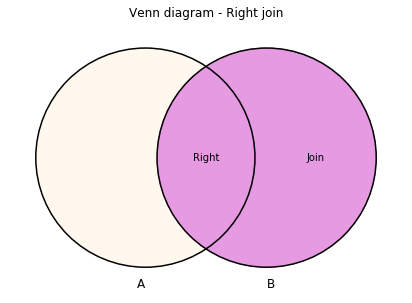

In [8]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('')
v.get_label_by_id('01').set_text('Join')
v.get_label_by_id('11').set_text('Right')

# Subset colors
v.get_patch_by_id('10').set_color('#FFEFD5')
v.get_patch_by_id('01').set_color('#DA70D6')
v.get_patch_by_id('11').set_color('#DA70D6')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_alpha(0.7)
v.get_patch_by_id('11').set_alpha(0.7)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings
plt.title("Venn diagram - Right join")

plt.show()

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:gray">RIGHT JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id <br>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float:left">
  <tr>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">FirstName</th>
    <th class="tg-9hbo">LastName</th>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">Name</th>
  </tr>
  <tr>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Betty</td>
    <td class="tg-yw4l">Wallace</td>
    <td class="tg-yw4l">1</td>
    <td class="tg-yw4l">Austria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Rachel</td>
    <td class="tg-yw4l">Bishop</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">Bulgaria</td>
  </tr>
  <tr>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Joan</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">Germany</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Indonesia</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">China</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">New Zeland</td>
  </tr>
</table>

### <span style="color:#483D8B;padding: 0px">Symmetric difference</span>

In mathematics, the symmetric difference of two sets is everything, but their intersection. With other words the set difference of $ A \smallsetminus B $ and $ B \smallsetminus A $ <br>
Another name for symmetric difference is disjunctive union and there are several notations of it:

${\displaystyle A\,\triangle \,B,}$
or
${\displaystyle A\ominus B,}$
or
${\displaystyle A\oplus B.}$ The first one is most commonly used.

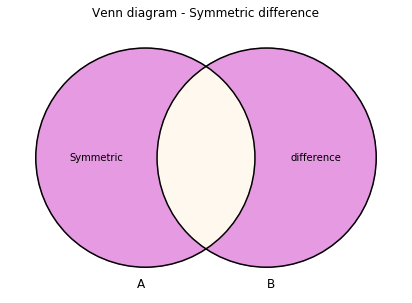

In [9]:
plt.figure(figsize=(7,7))

# Subset sizes
s = (
    2,  # Ab
    2,  # aB
    1,  # AB
)

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
v.get_label_by_id('10').set_text('Symmetric')
v.get_label_by_id('01').set_text('difference')
v.get_label_by_id('11').set_text('')

# Subset colors
v.get_patch_by_id('10').set_color('#DA70D6')
v.get_patch_by_id('01').set_color('#DA70D6')
v.get_patch_by_id('11').set_color('#FFEFD5')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.7)
v.get_patch_by_id('01').set_alpha(0.7)
v.get_patch_by_id('11').set_alpha(0.4)

# Border styles
c = venn2_circles(subsets=s, linestyle='solid')
c[0].set_ls('solid')  # Line style
c[0].set_lw(1.5)      # Line width
c[1].set_lw(1.5)

# Diagram settings
plt.title("Venn diagram - Symmetric difference")

plt.show()

The whole notation is denoted like this:

$$
{\displaystyle A\,\triangle \,B=(A\smallsetminus B)\cup (B\smallsetminus A)}
$$

If we look the previous Venn Diagrams, we will notice that the symmetric difference can also be expressed as the union of the two sets, minus their intersection:

$$
{\displaystyle A\,\triangle \,B=(A\cup B)\smallsetminus (A\cap B)}
$$

The SQL query and the generated result for it:

<span style="color:blue">SELECT</span> u.Id, u.FirstName, u.LastName,<br>
       c.Id, c.Name <br>
  <span style="color:blue">FROM</span> Users <span style="color:blue">AS</span> u <br>
 <span style="color:blue">FULL</span><span style="color:gray"> OUTER JOIN</span> Countries <span style="color:blue">AS</span> c <br>
    <span style="color:blue">ON</span> u.CountryId = c.Id <br>
    <span style="color:blue">WHERE</span> u.CountryId <span style="color:gray">IS NULL</span> <br>
  <span style="color:gray">OR</span> c.Id <span style="color:gray">IS NULL</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" style="float: left">
  <tr>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">FirstName</th>
    <th class="tg-9hbo">LastName</th>
    <th class="tg-9hbo">Id</th>
    <th class="tg-9hbo">Name</th>
  </tr>
  <tr>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Jean</td>
    <td class="tg-yw4l">Pierce</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">Irene</td>
    <td class="tg-yw4l">Peters</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">Quentin</td>
    <td class="tg-yw4l">Tarantino</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">Indonesia</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">5</td>
    <td class="tg-yw4l">China</td>
  </tr>
  <tr>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">NULL</td>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">New Zeland</td>
  </tr>
</table>

### <span style="color:#483D8B;padding: 0px">Conclusions</span>

While I studied SQL the joins were the most annoying thing. And when I read a couple of articles I realized they are actually really simple. <br>
I do believe that when we have a clearer visual representation of the something, we understand it a lot quicker and easier. This was the whole idea of my notebook. To give a visual and code representation of SQL joins. <br>
The more we learn SQL, the more we will understand that nothing is so simple there. For instance, it's not something rare to join 3, 4, 5 or even more tables in SQL. And all the join conditions can differ. The first join can be Inner, the second one left and so on and so fort. The important thing is, that when we know exactly how joins work, it's not hard to make more complex queries, because after all everything comes down to the most basic things, which are all shown in the examples above. When we learn the basics, we can make our own join criteria's  and then write them with confidence.

### <span style="color:#483D8B;padding: 0px">References</span>

<div style="font-size: 0.9em">
For a deeper jump, also some quotes were from there:<br>
[1] <a href="https://arxiv.org/ftp/cs/papers/0406/0406029.pdf">Subset Queries in Relational Databases</a>, by <i>Satyanarayana R Valluri & Kamalakar Karlapalem</i><br>
[2] <a href="https://arxiv.org/pdf/cs/0601043.pdf">Combining Relational Algebra, sql, Constraint
Modelling, and Local Search∗</a>, by <i>Marco Cadoli and Toni Mancini</i><br>
URLs to the other references used in the notebook plus some helpful links for better understanding the topic: <br>
[3] <a href="http://www.sqlservercentral.com/articles/Stairway+Series/75776/">Stairway+Series</a><br>
[4] <a href="https://www.sqlshack.com/mathematics-sql-server-fast-introduction-set-theory/">mathematics-sql-server-fast-introduction-set-theory</a><br>
[5] <a href="http://sqlmag.com/t-sql/t-sql-foundations-thinking-sets">t-sql-foundations-thinking-sets</a><br>
[6] <a href="http://www.idiotinside.com/2017/08/19/set-theory-and-python-tips-tricks/">set-theory-and-python-tips-tricks</a><br>
[7] <a href="https://en.wikibooks.org/wiki/Relational_Database_Design/Basic_Concepts">Relational_Database_Design/Basic_Concepts</a><br>
[8] <a href="https://medium.com/basecs/set-theory-the-method-to-database-madness-5ec4b4f05d79">set-theory-the-method-to-database-madness</a><br>
[9] <a href="https://www.mathsisfun.com/sets/venn-diagrams.html">venn-diagrams</a><br>
[10] <a href="http://www.mathsisfun.com/sets/symbols.html">sets/symbols</a><br>
[11] <a href="http://www.purplemath.com/modules/venndiag.htm">http://www.purplemath.com/modules/venndiag.htm</a><br>
[12] <a href="https://blog.teamsql.io/the-seven-types-of-sql-joins-5bc72f69a609">the-seven-types-of-sql-joins</a><br>
</div>